In [2]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from kd_export import train_light_ce, test_light_ce, train_light_ce_and_kd, test_light_ce_and_kd

Organizing dataset...

+------------+-------------------------+------------------------+
| Tool       |   Training Images Moved |   Testing Images Moved |
+============+=========================+========================+
| bottle     |                     209 |                     20 |
+------------+-------------------------+------------------------+
| cable      |                     224 |                     58 |
+------------+-------------------------+------------------------+
| capsule    |                     219 |                     23 |
+------------+-------------------------+------------------------+
| carpet     |                     280 |                     28 |
+------------+-------------------------+------------------------+
| grid       |                     264 |                     21 |
+------------+-------------------------+------------------------+
| hazelnut   |                     391 |                     40 |
+------------+-------------------------+-------------

Knowledge distillation run
--------------------------

<Figure size 640x480 with 0 Axes>

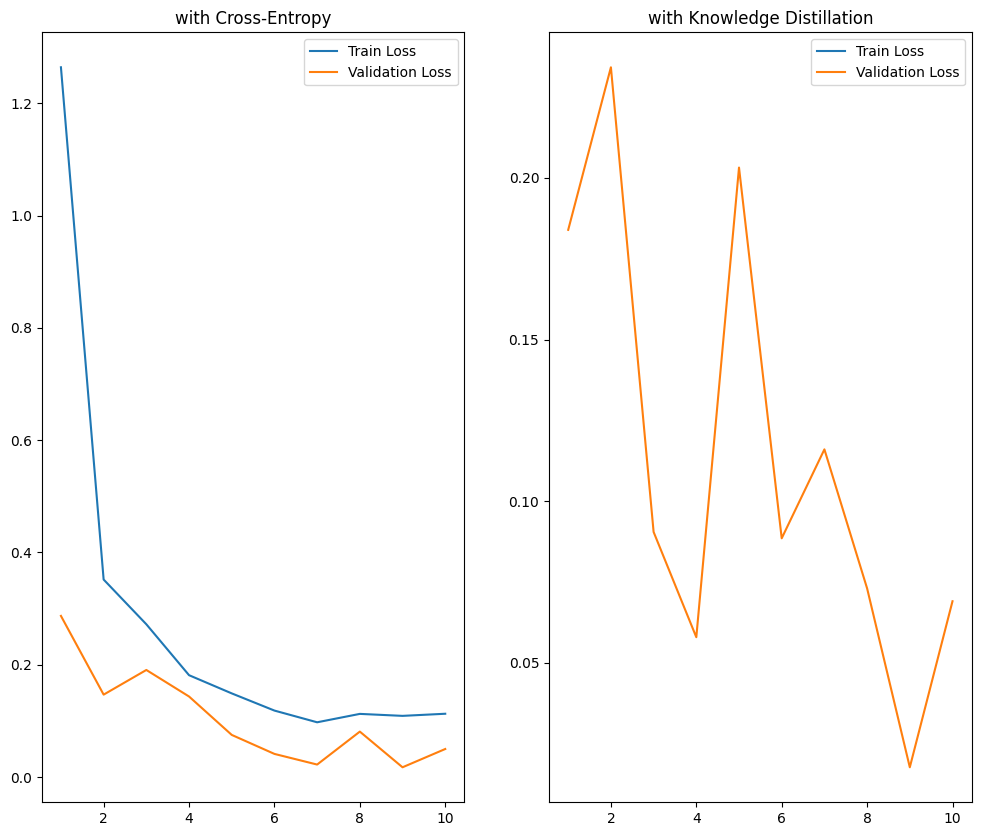

In [3]:
test_accuracy_light_ce = test_light_ce[1]["accuracy"] * 100
test_accuracy_light_ce_and_kd = test_light_ce_and_kd[1]["accuracy"] * 100

plt.suptitle("Training and Validation Loss of Student model", fontsize=16)

# Visualize the loss scores of student model - ce
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_light_ce[0], label="Train Loss")
plt.plot(range(1, 11), train_light_ce[1], label="Validation Loss")
# plt.axhline(y=test_accuracy_light_ce, color='red', linestyle='--', label='Test Accuracy')
plt.legend(loc='upper right')
plt.title('with Cross-Entropy')

# Visualize the loss scores of student model - ce + kd
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_light_ce_and_kd[0], label="Train Loss")
plt.plot(range(1, 11), train_light_ce_and_kd[1], label="Validation Loss")
# plt.axhline(y=test_accuracy_light_ce_and_kd, color='red', linestyle='--', label='Test Accuracy')
plt.legend(loc='upper right')
plt.title('with Knowledge Distillation')
plt.show()


<Figure size 800x600 with 0 Axes>

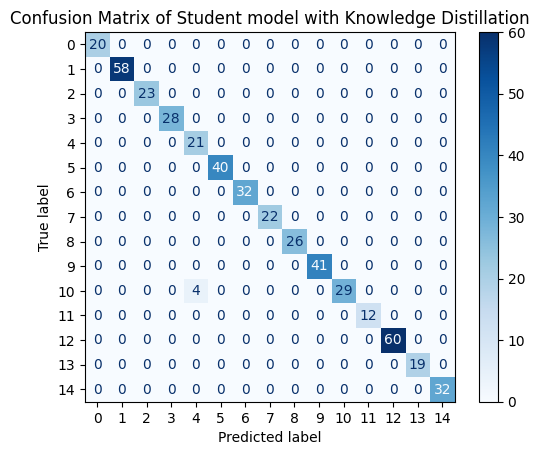

In [4]:
# Generate the confusion matrix
cm = test_light_ce_and_kd[0]
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Student model with Knowledge Distillation")
plt.show()